# Problem statement

This dataset is a collection of movies and tv shows I watched on Netflix. The sole purpose of this project is to analyse the data and identify the trends and relation between different categories of my watching such as Genre, IMDB rating etc.

# Data collection

This data was extracted from my Netflix account and some additions were made by me.

# Data ingestion

In [1]:
#importing all necessary libraries
import numpy as np#linear algebra
import pandas as pd #for data preparation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/Netflix_file.csv")
data.head(10)

,Title,Genre,Age Rating,Content Type,Duration(min),Origin Country,Main Cast,Audio,IMDB rate,Seasons,Release Year
0,Lucifer: Season 5: Daniel Espinoza: Naked and ...,"Crime, Fantasy",16+,TV Show,43,United States,"Tom Ellis , Lauren German ,Kevin Alejandro, D....",English,8.1,6.0,2016.0
1,Lucifer: Season 5: Resting Devil Face,"Crime, Fantasy",16+,TV Show,43,United States,"Tom Ellis , Lauren German ,Kevin Alejandro, D....",English,8.1,6.0,2016.0
2,Lucifer: Season 5: Bloody Celestial Karaoke Jam,"Crime, Fantasy",16+,TV Show,43,United States,"Tom Ellis , Lauren German ,Kevin Alejandro, D....",English,8.1,6.0,2016.0
3,Lucifer: Season 5: Family Dinner,"Crime, Fantasy",16+,TV Show,43,United States,"Tom Ellis , Lauren German ,Kevin Alejandro, D....",English,8.1,6.0,2016.0
4,Extraction 2,Action,18+,Movie,123,United States,"Chris Hemsworth , Golshifteh Farahani , Adam ...",English,7.1,2.0,2023.0
5,Friends: Season 2: The One Where Joey Moves Out,Comedy,13+,TV Show,22,United States,"Jennifer Aniston, Courtney Cox, Lisa Kudrow, M...",English,8.9,10.0,1994.0
6,Friends: Season 10: The One with Ross's Grant,Comedy,13+,TV Show,22,United States,"Jennifer Aniston, Courtney Cox, Lisa Kudrow, M...",English,8.9,10.0,1994.0
7,See You in My 19th Life: The Inability to Forg...,Romance,13+,TV Show,60,South Korea,"Shin Hye-sun, Ahn Bo-hyun, Ha Yoon-kyung, and ...",Korean,8.8,1.0,2023.0
8,See You in My 19th Life: Am I the Butterfly or...,Romance,13+,TV Show,60,South Korea,"Shin Hye-sun, Ahn Bo-hyun, Ha Yoon-kyung, and ...",Korean,8.8,1.0,2023.0
9,See You in My 19th Life: The Agony of Parting ...,Romance,13+,TV Show,60,South Korea,"Shin Hye-sun, Ahn Bo-hyun, Ha Yoon-kyung, and ...",Korean,8.8,1.0,2023.0


In [4]:
data.tail()

,Title,Genre,Age Rating,Content Type,Duration(min),Origin Country,Main Cast,Audio,IMDB rate,Seasons,Release Year
237,Interstellar,"Sci-fi, Drama",13+,Movie,170,United States,"Matthew McConaughey , Anne Hathaway , Jessica ...",English,8.7,1.0,2014.0
238,Lust Stories,Rom-com,18+,Movie,120,India,"Kiara Advani, Vicky Kaushal, Bhumi Padnekar, R...",Hindi,7.3,1.0,2018.0
239,HIT: The First Case,Thriller,18+,Movie,141,India,"Rajkummar Rao , Sanya Malhotra, Akhil Iyer , J...",Hindi,6.8,1.0,2022.0
240,Delhi Crime: Season 2: Episode 5,Thriller,18+,TV Show,48,India,Shefali Shah · Rasika Dugal · Rajesh Tailang ·...,Hindi,8.5,2.0,2022.0
241,Delhi Crime: Season 2: Episode 4,Thriller,18+,TV Show,42,India,Shefali Shah · Rasika Dugal · Rajesh Tailang ·...,Hindi,8.5,2.0,2022.0


In [5]:
data.shape

(242, 11)

In [6]:
data.columns

Index(['Title', 'Genre', 'Age Rating', 'Content Type', 'Duration(min)',
       'Origin Country', 'Main Cast', 'Audio', 'IMDB rate', 'Seasons',
       'Release Year'],
      dtype='object')

In [7]:
#genre at even indexes
data['Genre'][0::10]

,Genre
0,"Crime, Fantasy"
10,Romance
20,Comedy
30,Romance
40,"Revenge, Emotional"
50,"Revenge, Emotional"
60,Comedy
70,Teen-drama
80,Comedy
90,Rom-com


# EDA

# Data Cleaning

In [8]:
#checking details of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           242 non-null    object 
 1   Genre           242 non-null    object 
 2   Age Rating      235 non-null    object 
 3   Content Type    232 non-null    object 
 4   Duration(min)   242 non-null    int64  
 5   Origin Country  242 non-null    object 
 6   Main Cast       242 non-null    object 
 7   Audio           235 non-null    object 
 8   IMDB rate       242 non-null    float64
 9   Seasons         223 non-null    float64
 10  Release Year    240 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 20.9+ KB


In [22]:
numeric_data = data[['Duration(min)', 'IMDB rate', 'Seasons', 'Release Year']].dropna()

In [9]:
#Find the duplicates

data.duplicated().sum()

np.int64(30)

In [10]:
#Find null values

data.isnull().sum()

,0
Title,0
Genre,0
Age Rating,7
Content Type,10
Duration(min),0
Origin Country,0
Main Cast,0
Audio,7
IMDB rate,0
Seasons,19


In [11]:
#Replace null values

data.replace(np.nan,'0',inplace = True)

#Check the changes now
data.isnull().sum()

,0
Title,0
Genre,0
Age Rating,0
Content Type,0
Duration(min),0
Origin Country,0
Main Cast,0
Audio,0
IMDB rate,0
Seasons,0


In [12]:
#unique values

data['Genre'].unique()

array(['Crime, Fantasy', 'Action', 'Comedy', 'Romance', 'Reality',
       'Drama', 'Dramedy', 'Revenge, Emotional', 'Suspense, Fantasy',
       'Teen-drama', 'Emotional', 'Rom-com', 'Slice-of-life',
       'Crime, Suspense', 'Suspense', 'Fantasy', 'Period-piece',
       'Lifestyle', 'Thriller', 'Crime, Emotional', 'Documentary',
       'Coming-Of-Life', 'Dark Drama', 'Sci-fi, Drama'], dtype=object)

In [13]:
#Filter data

data[data['Genre']=='Drama'].head()

,Title,Genre,Age Rating,Content Type,Duration(min),Origin Country,Main Cast,Audio,IMDB rate,Seasons,Release Year
26,Tu Jhoothi Main Makkaar,Drama,13+,Movie,159,India,"Ranbir Kapoor, Shradhha Kapoor, Anubhav S. Bassi",Hindi,6.1,0,2023.0
57,Valeria: Season 3: Getting Old,Drama,18+,TV Show,61,Spain,"Diana Gómez , Silma López, Paula Malia, Tere...",Spanish,6.6,3.0,2020.0
58,Valeria: Season 3: The Word,Drama,18+,TV Show,61,Spain,"Diana Gómez , Silma López, Paula Malia, Tere...",Spanish,6.6,3.0,2020.0
59,Valeria: Season 3: Taste You,Drama,18+,TV Show,61,Spain,"Diana Gómez , Silma López, Paula Malia, Tere...",Spanish,6.6,3.0,2020.0
72,Valeria: Season 3: I Was There,Drama,18+,TV Show,61,Spain,"Diana Gómez , Silma López, Paula Malia, Tere...",Spanish,6.6,3.0,2020.0


In [14]:
data['Origin Country'].unique()

array(['United States', 'South Korea', 'India', 'Spain', 'United Kingdom',
       'Japan'], dtype=object)

# Data Visualization:

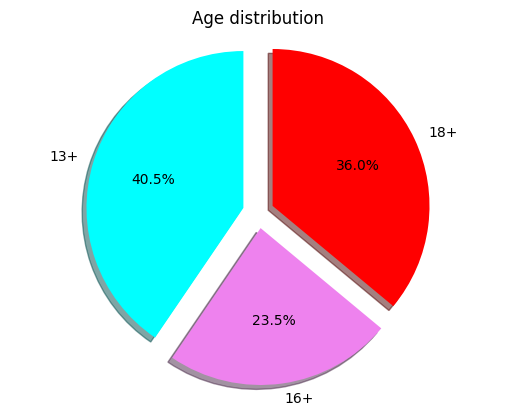

In [15]:
#distribution of rating
labels= ['13+', '16+', '18+']
colors=['cyan', 'violet', 'red']
x= ['100','58','89']

plt.pie(x,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',shadow= True,explode=(0.1, 0.1, 0.1))
plt.title("Age distribution")
plt.axis('equal')
plt.show()

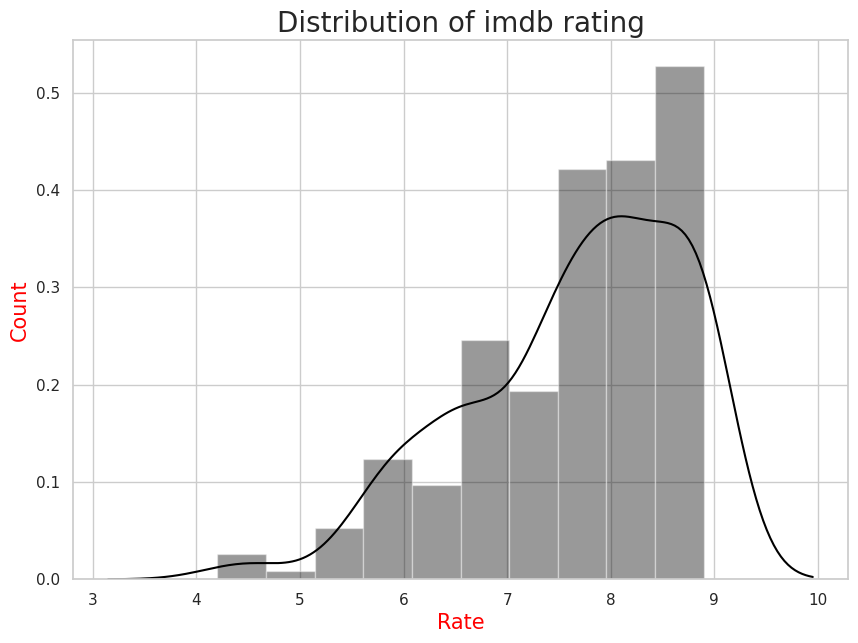

In [16]:
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
sns.distplot(data['IMDB rate'],color ='black')
plt.title("Distribution of imdb rating",fontsize=20)
plt.xlabel("Rate",fontsize=15,color='red')
plt.ylabel("Count",fontsize=15,color='red')
plt.show()

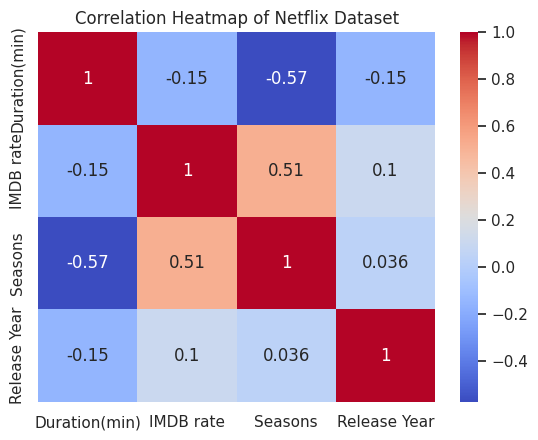

In [25]:
#Correlation plot
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Netflix Dataset")
plt.show()

## Outliers:

<Figure size 1500x1500 with 0 Axes>

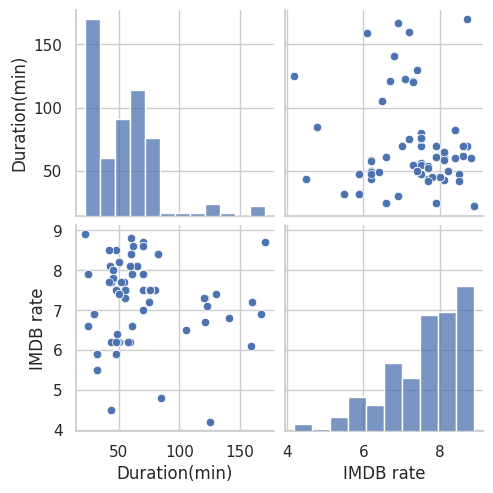

In [26]:
plt.figure(figsize=(15,15))
sns.pairplot(data)
plt.show()

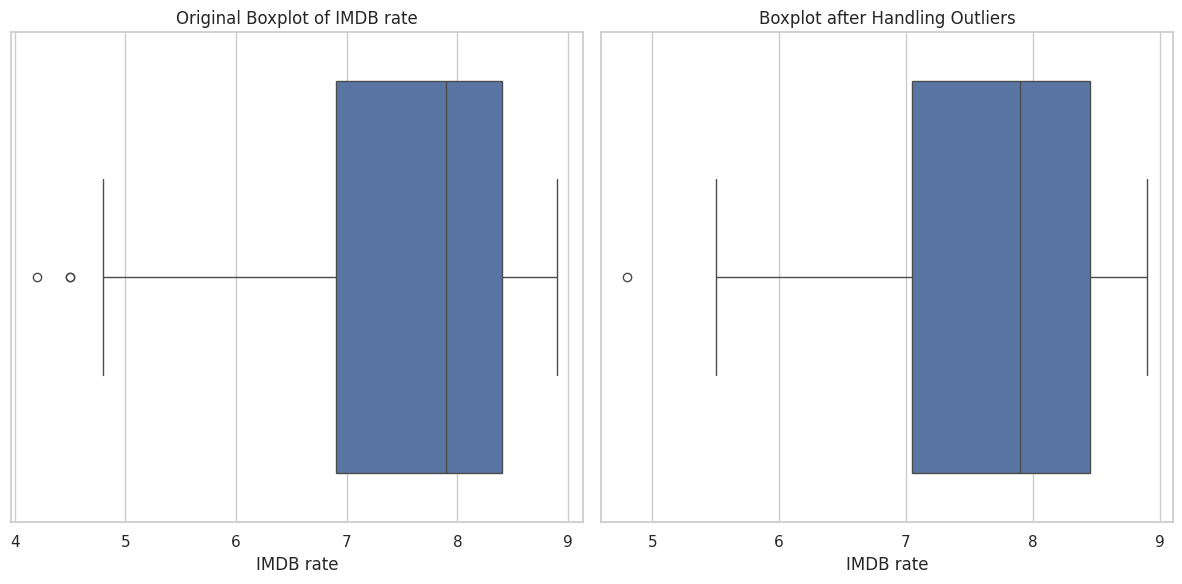

In [27]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
feature='IMDB rate'
# Plot the original boxplot
sns.boxplot(x=data[feature], ax=axes[0])
axes[0].set_title(f"Original Boxplot of {feature}")

# Identify and handle outliers
Q1 = data[feature].quantile(0.25)
Q3 = data[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Plot the boxplot after handling outliers
sns.boxplot(x=filtered_data[feature], ax=axes[1])
axes[1].set_title(f"Boxplot after Handling Outliers")

# Display the plots
plt.tight_layout()
plt.show()

### Conclusion:
Python language contains many various libraries and methods inside it which is useful for exploratory data analysis and various types of data visualisation. This was a small attempt made by me while learning about these libraries and exploring them. I hope to explore more about python and learn new & different things.